Caso: Utilizar la herramienta Python para anlizar las ventas de chocolates y predecir la ventas.  

##Resumen
Conjunto de datos contiene registros detallados de las ventas de chocolate , incluyendo detalles del producto, cantidades vendidas, ingresos

# Metodologia de la recoleccion:
Los datos recolectados de la venta de chocolate del segmento de minoristas de chocolate y mercados en línea .

Sólo se incluyeron transacciones confirmadas para garantizar la precisión.

Los valores de los ingresos reflejan los precios finales después de aplicar los descuentos

# Objetivo del analisis:
Predecir las ventas de chocolates en funcion a datos históricos de ventas

# Variables involucradas en el dataset venta de chocolate


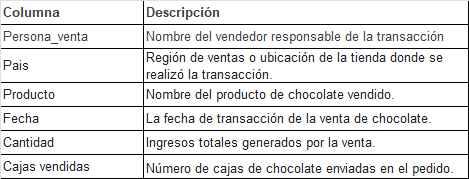

##Paso I: importar las librerias que se utiliza para la manipulación de los datos

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Paso II: cargarmos el archivo, archivo.csv

In [38]:
# utilizando google drive
from google.colab import drive
drive.mount('/content/drive')
ruta="/content/drive/MyDrive/Python /Chocolate Sales.csv"
dato=pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
dato.head(3)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91


# Cambiar el nombre de las columnas


In [40]:
# renombrar las variables utilizando la funcion df.rename(columns=nuevos_nombres, inplace=True), donde nuevos_nombre es un diccionario y inplace True significa que los
# cambios se hace directamente sobre el objeto original
nuevo_nombre={"Sales Person":"Persona_venta",
              "Country":"Pais",
              "Product":"Producto",
              "Date":"fecha",
              "Amount":"Cantidad",
              "Boxes Shipped":"Cajas_vendidas"
              }
dato.rename(columns=nuevo_nombre,inplace=True)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91


##Paso III: Estructura de los datos

In [41]:
# Para estructurar los datos, tener información del número de columna, registros, tipo de dato. etc
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]
    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])
    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Valor Único": unique
    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')
    return result_trans

In [42]:
Estructura_datos=analizar_dataframe(dato)
Estructura_datos

Cantidad de Columnas: 6
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Valor Único
0,Persona_venta,1094,object,0,Jehu Rudeforth
1,Pais,1094,object,0,UK
2,Producto,1094,object,0,Mint Chip Choco
3,fecha,1094,object,0,04-Jan-22
4,Cantidad,1094,object,0,"$5,320"
5,Cajas_vendidas,1094,int64,0,180


Observación:
El conjunto de datos está compuesto por seis columnas principales, descritas a continuación:
1. Cantidad de registros: Cada columna contiene un total de 1094 registros, lo que denota una tabla completa sin filas omitidas.
2. Tipo de Datos:Las columnas "Persona_venta", "Pais", "Producto", "fecha" y "Cantidad" son de tipo object (texto), y la columna "Caja_vendidas" es de tipo int (número enteros).
3. valores nulos: Ninguna de las columna contiene valores nulos. Lo que asegura que los datos estan completos para análisis posteriores
4. La columna fecha: nos indica que la columna fecha debe ser convertida a tipo de dato Date (fecha)
5. la columna cantidad: nos indica que se debe eliminar el caracter $ y convertir a tipo de dato numerico


##PasoIV:Corregir los errores tipograficos y formatos inconsistentes:


###A.  corregir la columna "cantidad":
### 1. eliminar el caracter "$" y ",".
### 2. convertir el tipo de dato de string a numerico

In [43]:
# 1. Eliminar el caracter "$"y , utilizamos la funcion de string para remplazar el caracter utilizamos la expresión regular \$|,: lo que quiere decir busca y elimina cualquier caracter $ y ,
# convierte el tipo de dato object a numerico (float)(decimal)
dato['Cantidad'] = dato['Cantidad'].replace({'\$|,': ''}, regex=True).astype(float)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91


### B. Convertir los registros de la columna "fecha" de tipo de dato object a tipo de dato date##

In [44]:
# convertir los registros de la columna "fecha" de tipo dato de string a tipo de dato Date, donde vamos especificar que el formato:"%Y-%m_%d"
dato['fecha'] = pd.to_datetime(dato['fecha']).dt.normalize()
dato.head()

<ipython-input-44-4a3c949f5009>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dato['fecha'] = pd.to_datetime(dato['fecha']).dt.normalize()


,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


### C. convertir los registros de texto todos a minuscula para tener la informacion unificada

In [45]:
# comvertir las columna string en minuscula para unificar
dato['Persona_venta'] = dato['Persona_venta'].str.lower()
dato['Pais'] = dato['Pais'].str.lower()
dato['Producto'] = dato['Producto'].str.lower()
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91


In [46]:
# vamos a definir una funcion para convertir las columnas que son object a minuscula independientemente tenga columna string en minuscula
def convertir_a_minusculas(df):
  for col in df.select_dtypes(include=['object']):
    df[col] = df[col].str.lower()
  return df

definicion de la funcion:
1. llamamos a la funcion convertir_a_minusculas, con parametro df

2. Hacemos un ciclo con for donde le decimos en la col hasta las columnas seleccionada como string
3. a las columnas string conviertela a minuscula con la funcion str.lower()
4. retornalo al df

In [47]:
dato=convertir_a_minusculas(dato)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91


Nota: esta función puede ser usada para todo los df que quieran convertirlo las columnas string a minuscula.

## Paso V: verificar que las columnas string se encuentren agrupadas sin errores en la nomenclatura

In [48]:
# Verificar valores unicos usamos una funcion que se va a llamar mostrar_valores_unicos
def mostrar_valores_unicos(df):
  valores_unicos_por_columna = {}
  for col in df.select_dtypes(include=['object']):
        valores_unicos = df[col].unique()
        valores_unicos_por_columna[col] = valores_unicos
        print(f"Valores únicos en la columna '{col}':")
  return valores_unicos_por_columna

In [49]:
resultados=mostrar_valores_unicos(dato)
resultados

Valores únicos en la columna 'Persona_venta':
Valores únicos en la columna 'Pais':
Valores únicos en la columna 'Producto':


{'Persona_venta': array(['jehu rudeforth', 'van tuxwell', 'gigi bohling', 'jan morforth',
        'oby sorrel', 'gunar cockshoot', 'brien boise',
        'rafaelita blaksland', 'barr faughny', 'mallorie waber',
        'karlen mccaffrey', "marney o'breen", 'beverie moffet',
        'roddy speechley', 'curtice advani', 'husein augar', 'kaine padly',
        'dennison crosswaite', "wilone o'kielt", 'andria kimpton',
        'kelci walkden', 'camilla castle', 'madelene upcott',
        'dotty strutley', 'ches bonnell'], dtype=object),
 'Pais': array(['uk', 'india', 'australia', 'new zealand', 'usa', 'canada'],
       dtype=object),
 'Producto': array(['mint chip choco', '85% dark bars', 'peanut butter cubes',
        'smooth sliky salty', '99% dark & pure', 'after nines',
        '50% dark bites', 'orange choco', 'eclairs', 'drinking coco',
        'organic choco syrup', 'milk bars', 'spicy special slims',
        'fruit & nut bars', 'white choc', 'manuka honey choco',
        'almond cho

### esta es la segunda forma

In [50]:
for col in dato.select_dtypes(include=['object']):
    # Obtener los valores únicos de la columna
    valores_unicos = dato[col].unique()
    print(f"Valores únicos en la columna '{col}:")
    print(valores_unicos)
    print()


Valores únicos en la columna 'Persona_venta:
['jehu rudeforth' 'van tuxwell' 'gigi bohling' 'jan morforth' 'oby sorrel'
 'gunar cockshoot' 'brien boise' 'rafaelita blaksland' 'barr faughny'
 'mallorie waber' 'karlen mccaffrey' "marney o'breen" 'beverie moffet'
 'roddy speechley' 'curtice advani' 'husein augar' 'kaine padly'
 'dennison crosswaite' "wilone o'kielt" 'andria kimpton' 'kelci walkden'
 'camilla castle' 'madelene upcott' 'dotty strutley' 'ches bonnell']

Valores únicos en la columna 'Pais:
['uk' 'india' 'australia' 'new zealand' 'usa' 'canada']

Valores únicos en la columna 'Producto:
['mint chip choco' '85% dark bars' 'peanut butter cubes'
 'smooth sliky salty' '99% dark & pure' 'after nines' '50% dark bites'
 'orange choco' 'eclairs' 'drinking coco' 'organic choco syrup'
 'milk bars' 'spicy special slims' 'fruit & nut bars' 'white choc'
 'manuka honey choco' 'almond choco' 'raspberry choco'
 'choco coated almonds' "baker's choco chips" 'caramel stuffed bars'
 '70% dark bite

## Paso VI: validar el rango de valores que se encuentra en los limites esperados

In [51]:
min_max = pd.DataFrame({
    'Min': dato.apply(lambda col: col.min()),
    'Max': dato.apply(lambda col: col.max())
})

print("Mínimos y máximos para todas las columnas:")
print(min_max)

Mínimos y máximos para todas las columnas:
                                Min                  Max
Persona_venta        andria kimpton       wilone o'kielt
Pais                      australia                  usa
Producto             50% dark bites           white choc
fecha           2022-01-03 00:00:00  2022-08-31 00:00:00
Cantidad                        7.0              22050.0
Cajas_vendidas                    1                  709


## PAso VIII: Análizar Univariado: Análizar cada variable individual, nos permite explorar cada variable individualmente para entender su distribución y características principales

In [52]:
Analisis_univariable_numerica=dato.describe()
Analisis_univariable_numerica

,fecha,Cantidad,Cajas_vendidas
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [53]:
Analisis_univariable_objeto=dato.describe(include='object')
Analisis_univariable_objeto

,Persona_venta,Pais,Producto
count,1094,1094,1094
unique,25,6,22
top,kelci walkden,australia,eclairs
freq,54,205,60


#### Distribución de las ventas

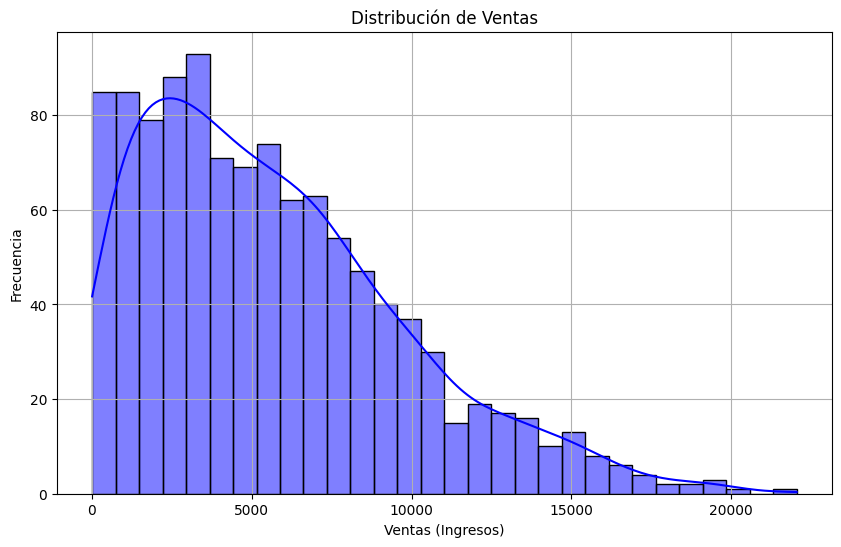

In [54]:
# Gráfico de desnsidad para observar la distribución de las ventas
# Seleccionar la columna de ventas (sustituye 'Ventas' con el nombre real de la columna)
ventas = dato["Cantidad"]

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Histograma
sns.histplot(ventas, kde=True, color="blue", bins=30)

# Personalizar el gráfico
plt.title("Distribución de Ventas")
plt.xlabel("Ventas (Ingresos)")
plt.ylabel("Frecuencia")
plt.grid(True)

# Mostrar el gráfico
plt.show()


#### Colclusion:
1. La Distribución y Concentración:
   la mayoria de las ventas se concentra en los rangos de ingresos bajos, esto puede indicar que los productos mas accesible genera mayor volumnen de transacciones.
2. Identificacion de outlier:
   la visualizacion de valores extremos del lado derecho, podria ser por que existe ventas inusuales o errores de registros.

3. Patron de Distribución:
   Puede guiar a estrategias de promociones de precios y diseño de productos, como incentivar la ventas en los segmentos altos.


#### Distribución de la Cantidad Vendidas

In [78]:
from itertools import groupby
# Agrupar por caja vendidas
cantidad_vendida=dato.groupby('Cajas_vendidas').agg({'Cajas_vendidas':'count'})
cantidad_vendida

,Cajas_vendidas
Cajas_vendidas,
1,1
2,3
3,3
4,4
5,3
...,...
294,1
295,1
296,4


In [93]:
# Crear un rango de cajas vendidas para mejorar la distribucion
# def funcion para crear un rango de cajas vendidas
def crear_rango_cajas(caja):
    if caja < 100:
        return 'menos de 100'
    elif 100 <= caja < 200:
        return '100 a 200'
    elif 200 <= caja < 300:
        return '200 a 300'
    elif 300 <= caja < 400:
        return '300 a 400'
    elif 400 <= caja < 500:
        return '400 a 500'
    else:
        return '500 y más'

In [95]:
dato["Rango_Cajas"] = dato["Cajas_vendidas"].apply(crear_rango_cajas)
dato.head(3)



,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas,Rango_Cajas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180,100 a 200
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94,menos de 100
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91,menos de 100


<ipython-input-96-aa16745926ec>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cantidad_vendida, palette="viridis", order=cantidad_vendida.value_counts().index)


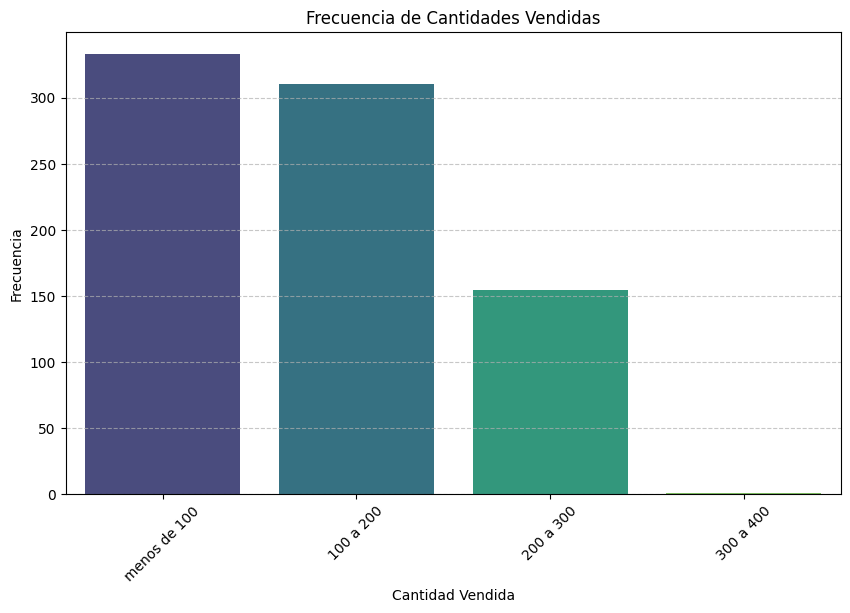

In [96]:
# Seleccionar la columna de cantidades vendidas (sustituye 'Cajas_vendidas' con el nombre real de la columna)
cantidad_vendida = dato["Rango_Cajas"]

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para la frecuencia
sns.countplot(x=cantidad_vendida, palette="viridis", order=cantidad_vendida.value_counts().index)

# Personalizar el gráfico
plt.title("Frecuencia de Cantidades Vendidas")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotación de etiquetas si hay muchas categorías
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


#### Conclusión:
1. La mayor frecuencia se refleja en rango de menos de 100 cajas con una frecuencia de venta de 300 transacciones, lo que sugiere que una gran proporcion de clientes tiende a realizar compras pequeñas.

2. la caida progresiva en ventas mayores de 200 observando un desinteres de los clientes en comprar una mayor cantidad

####Distribucion de las ventas en funcion al tiempo


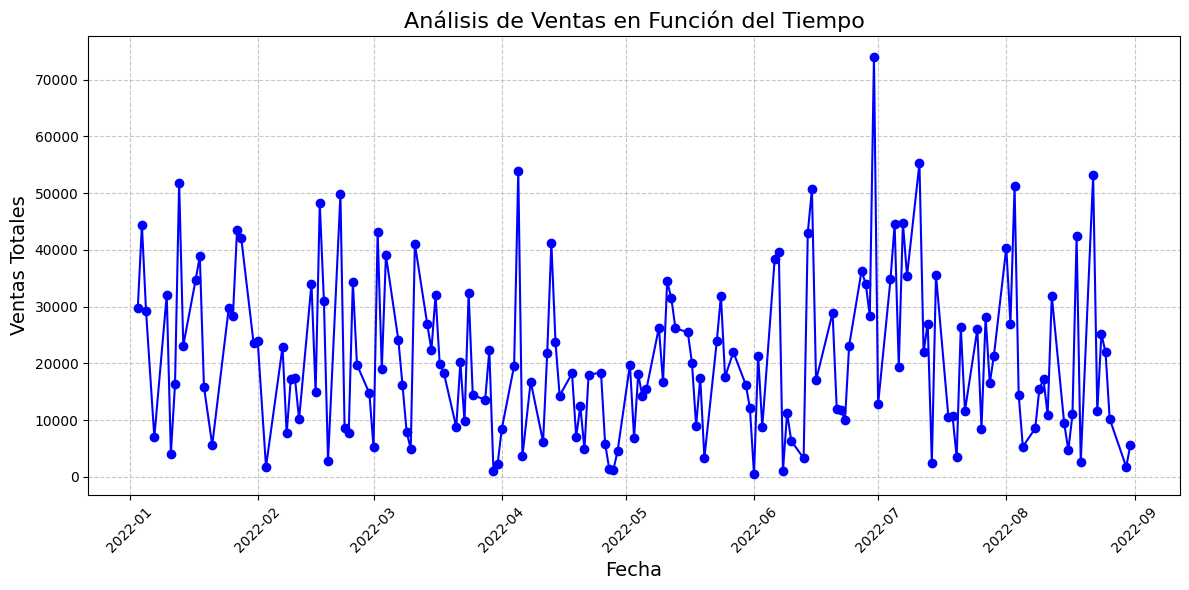

In [97]:
# Agrupar las ventas por fecha (si hay varias entradas por día)
ventas_por_dia = dato.groupby("fecha")["Cantidad"].sum().reset_index()
# Configurar el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_dia["fecha"], ventas_por_dia["Cantidad"], marker="o", linestyle="-", color="blue")

# Personalizar el gráfico
plt.title("Análisis de Ventas en Función del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Ventas Totales", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)  # Rotación para las etiquetas de fecha

# Mostrar el gráfico
plt.tight_layout()
plt.show()




#### conclusión:

1.	Alta variabilidad en las ventas diarias: A lo largo del período analizado, las ventas muestran fluctuaciones constantes, sin una tendencia claramente sostenida de aumento o disminución. Esto puede indicar que factores externos influyen significativamente en las ventas, como promociones, eventos, días festivos o cambios en la demanda.

2.	Picos significativos: Algunos días, como los observados en abril y junio, presentan ventas excepcionalmente altas. Estos picos podrían corresponder a campañas de marketing efectivas, lanzamientos de productos, o patrones estacionales que deberían ser investigados.

3.	Días con ventas bajas: También hay periodos donde las ventas caen notablemente. Identificar las razones detrás de estos días podría ofrecer oportunidades para mejorar la estrategia comercial y mantener una mayor constancia en los ingresos.

4.	Implicaciones estratégicas: Este comportamiento sugiere que sería beneficioso realizar un análisis más detallado sobre los factores que causan las fluctuaciones, optimizando los esfuerzos para maximizar ventas en días de baja actividad y aprovechar los picos.


#### Distribucion por categoría de producto:  para observar la preferencia del producto


<ipython-input-100-fdf09fd389fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categoria_popularidad.index, x=categoria_popularidad.values, palette="viridis")


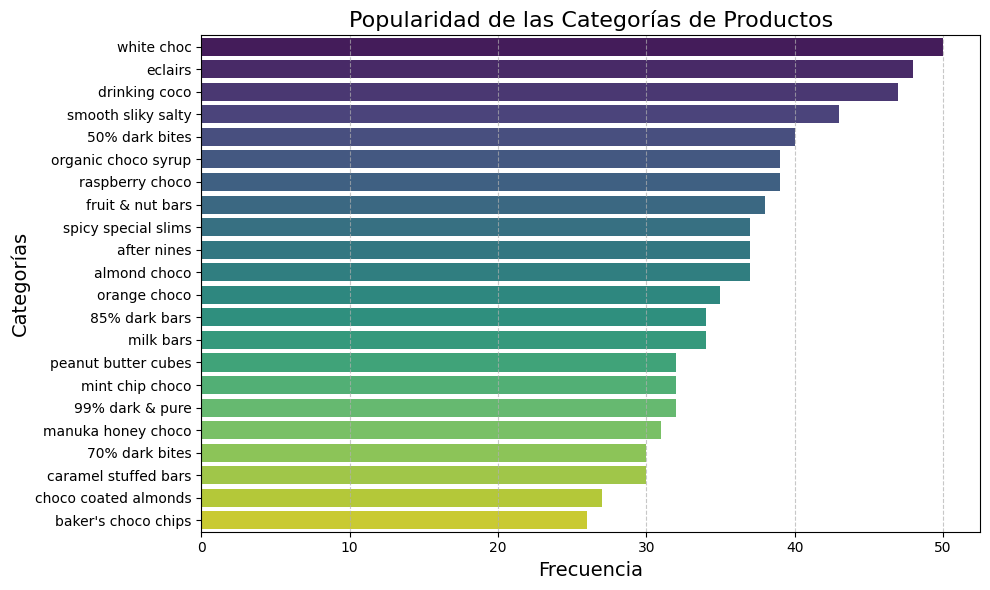

In [100]:

# Seleccionar la columna de categorías (sustituye 'Categoria' por el nombre real de la columna)
categoria_popularidad = dato["Producto"].value_counts()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(y=categoria_popularidad.index, x=categoria_popularidad.values, palette="viridis")

# Personalizar el gráfico
plt.title("Popularidad de las Categorías de Productos", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Categorías", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Conclusion:
El gráfico muestra la popularidad de diferentes categorías de productos de chocolate, destacando qué opciones son las más elegidas por los consumidores:

1.	Productos más populares: Los productos más destacadas son white choc, eclairs y drinking coco. Esto podría indicar que los consumidores tienen una fuerte preferencia por estas variedades, posiblemente debido a su sabor, precio o disponibilidad.

2. Menor demanda en ciertas categorías: Las categorías como mint chip chocs y peanut butter cubes tienen una menor popularidad. Esto podría deberse a una menor oferta, falta de promoción o simplemente una preferencia limitada del público.

3. Implicaciones comerciales: Los datos sugieren que vale la pena invertir más en los productos líderes para maximizar ganancias, pero también sería estratégico evaluar formas de impulsar las categorías menos populares mediante marketing o cambios en el producto.

#### Distribucion de las venta por pais


<ipython-input-101-01037ae00868>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cantidad", y="Pais", data=ventas_por_pais, palette="magma")


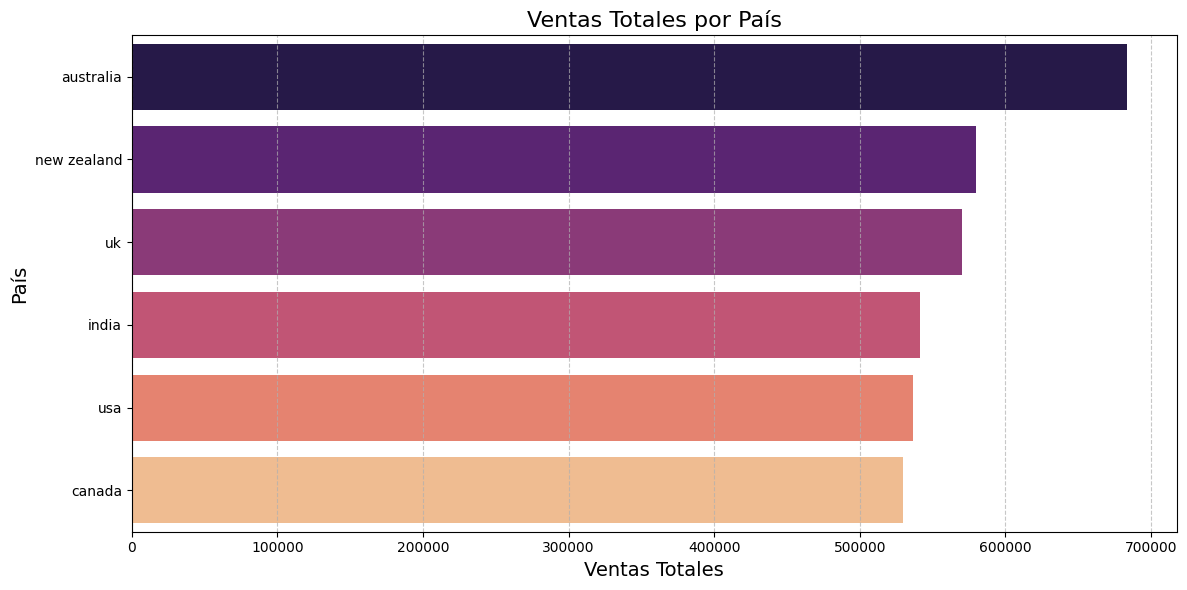

In [101]:
# Agrupar las ventas por país y calcular la suma total
ventas_por_pais = dato.groupby("Pais")["Cantidad"].sum().reset_index()

# Ordenar los países por ventas de mayor a menor
ventas_por_pais = ventas_por_pais.sort_values("Cantidad", ascending=False)

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x="Cantidad", y="Pais", data=ventas_por_pais, palette="magma")

# Personalizar el gráfico
plt.title("Ventas Totales por País", fontsize=16)
plt.xlabel("Ventas Totales", fontsize=14)
plt.ylabel("País", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Conclusion:
El rendimientos de las ventas lo refleja Australia, ya que, lidera la venta de chocolate, le sigue New Zealand , y UK.


## Paso VII: Detectar Outliers: Identificar valores que se desvian significativamente del resto.

### 1. Métodos visuales (boxplot,KDE, Histograma)


*  Boxplot: Resalta los outliers directamente fuera de los bigotes del gráfico.

*  KDE (kernel Density Estimation): Muestra áreas de baja densidad donde pueden ubicarse los outliers.

*   Histogramas: permite observar valores atipicos que se encuentran lejos de los principales puntos

Ventaja: son facil de entender

Limitación: Depende de la calidad de los datos.

al Visualizar los datos de esta forma te dará una base sólida para decidir si la distribución es normal y si hay valores atípicos. En función de esto, puedes decidir entre métodos como Z-score (si los datos son normales) o IQR (si no lo son).




### Visualizacion  del histograma y KDE la columna "Cantidad" que viene siendo el ingreso generado de las ventas después del descuento

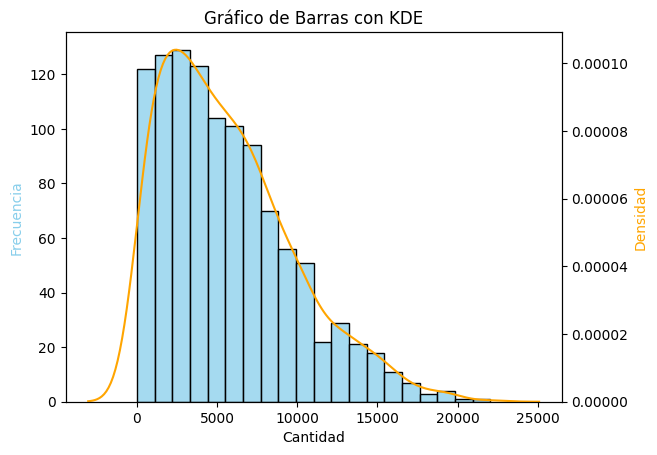

In [55]:
# Crear el gráfico
fig, ax1 = plt.subplots()
# Gráfico de barras (histograma)
sns.histplot(dato["Cantidad"], kde=False, bins=20, color='skyblue', ax=ax1)
ax1.set_ylabel('Frecuencia', color='skyblue')

# Crear un segundo eje para la KDE
ax2 = ax1.twinx()
sns.kdeplot(dato["Cantidad"], color='orange', ax=ax2)
ax2.set_ylabel('Densidad', color='orange')

# Configuración
plt.title("Gráfico de Barras con KDE")
plt.show()


### Observacion:
La distribución de los datos analizados es asimétrica, con un sesgo positivo (a la derecha). Esto indica que la mayoría de los valores se concentran en el extremo inferior, mientras que existe una cola extendida hacia valores superiores. Esta forma de distribución sugiere que los datos no se ajustan a una distribución normal y puede haber valores extremos que influyen en el patrón observado.

Esta conclusión: Dado el sesgo, es recomendable utilizar pruebas no paramétricas para la validación estadística y aplicar métodos como el IQR para identificar valores atípicos de manera precisa.

### Utilizamos el gráfico de caja para visualizar los puntos atipicos

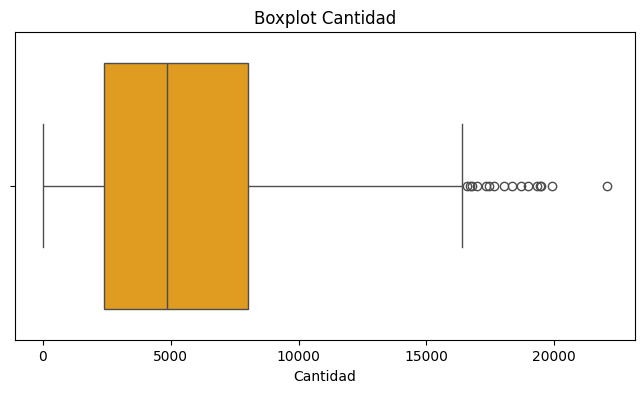

In [56]:
# Gráfico de caja para la columna cantidad
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dato['Cantidad'], color='orange')
plt.title("Boxplot Cantidad")
plt.xlabel("Cantidad")
plt.show()

Conclusión del analisis:

El diagrama de caja muestra claramente la distribución de los datos, destacando la presencia de valores atípicos en el lado superior de la escala. Estos valores extremos se encuentran fuera de los límites del rango intercuartílico (IQR) y son visibles como puntos individuales sobre los bigotes del gráfico.

### Visualizacion del Histograma y KDE la columna "Cajas_vendidas" el número de cajas enviadas en el pedido.

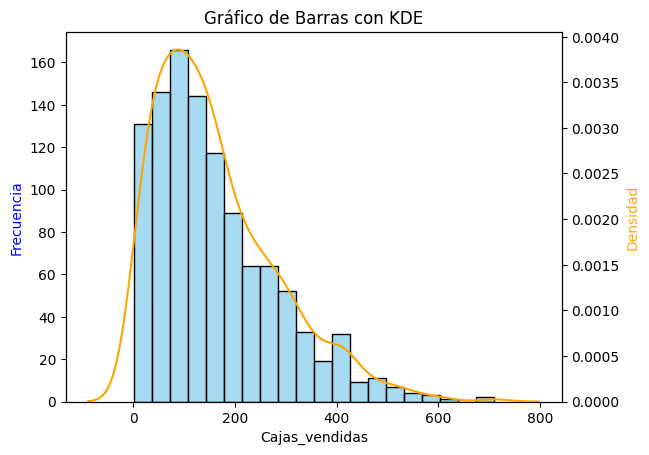

In [57]:
#Histograma y KDE para la columna "Cajas_vendidas"viadas en el pedido.
# Crear el gráfico
fig, ax1 = plt.subplots()
# Gráfico de barras (histograma)
sns.histplot(dato["Cajas_vendidas"], kde=False, bins=20, color='skyblue', ax=ax1)
ax1.set_ylabel('Frecuencia', color='blue')

# Crear un segundo eje para la KDE
ax2 = ax1.twinx()
sns.kdeplot(dato["Cajas_vendidas"], color='orange', ax=ax2)
ax2.set_ylabel('Densidad', color='orange')

# Configuración
plt.title("Gráfico de Barras con KDE")
plt.show()


Conclusion del analisis:

La distribución de los datos analizados es asimétrica, con un sesgo positivo (a la derecha). Esto indica que la mayoría de los valores se concentran en el extremo inferior, mientras que existe una cola extendida hacia valores superiores. Esta forma de distribución sugiere que los datos no se ajustan a una distribución normal y puede haber valores extremos que influyen en el patrón observado.

Esta conclusión: Dado el sesgo, es recomendable utilizar pruebas no paramétricas para la validación estadística y aplicar métodos como el IQR para identificar valores atípicos de manera precisa.
Dado el sesgo, es recomendable utilizar pruebas no paramétricas para la validación estadística y aplicar métodos como el IQR para identificar valores atípicos de manera precisa.

### Visualizacion del diagrama de caja


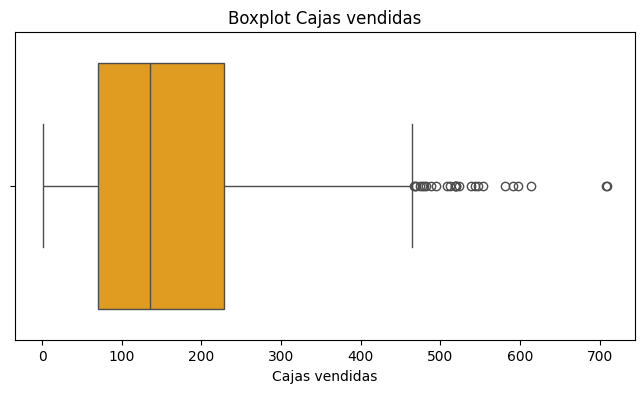

In [58]:
# Gráfico de caja para la columna cantidad
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dato['Cajas_vendidas'], color='orange')
plt.title("Boxplot Cajas vendidas")
plt.xlabel("Cajas vendidas")
plt.show()

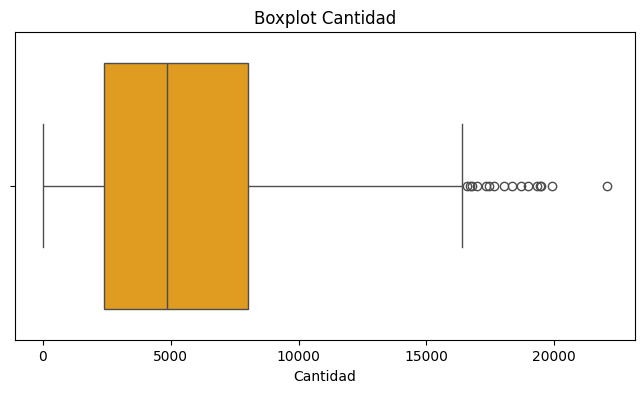

In [59]:
# Gráfico de caja para la columna cantidad
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dato['Cantidad'], color='orange')
plt.title("Boxplot Cantidad")
plt.xlabel("Cantidad")
plt.show()

Conclusión del análisis:

El diagrama de caja muestra claramente la distribución de los datos, destacando la presencia de valores atípicos en el lado superior de la escala. Estos valores extremos se encuentran fuera de los límites del rango intercuartílico (IQR) y son visibles como puntos individuales sobre los bigotes del gráfico.

### Diagrama de dispersion para las dos variables caja vendidas y cantidad

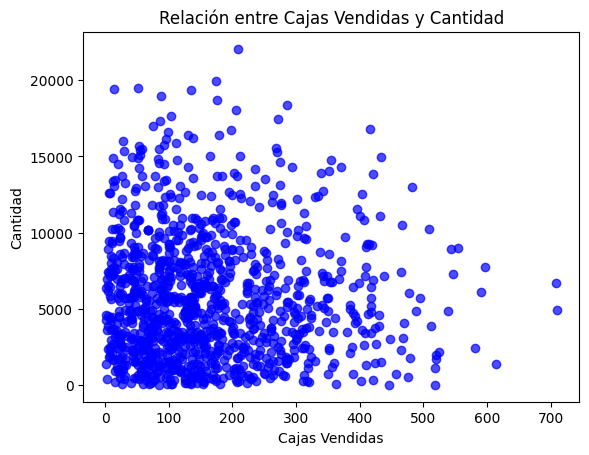

In [60]:
plt.scatter(dato['Cajas_vendidas'], dato['Cantidad'], color='blue', alpha=0.7)
plt.title('Relación entre Cajas Vendidas y Cantidad')
plt.xlabel('Cajas Vendidas')
plt.ylabel('Cantidad')
plt.show()

In [61]:
# Filtrar filas que NO cumplan las condiciones (Cajas Vendidas <= 500 y Cantidad <= 15000)
dato = dato[(dato['Cajas_vendidas'] <= 300) & (dato['Cantidad'] <= 10000)]
dato.describe()


,fecha,Cantidad,Cajas_vendidas
count,798,798.000000,798.000000
mean,2022-05-04 22:11:43.759398656,4312.403509,124.624060
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-03 00:00:00,2005.500000,61.250000
50%,2022-05-11 00:00:00,4028.500000,118.000000
75%,2022-07-05 00:00:00,6485.500000,176.750000
max,2022-08-31 00:00:00,9989.000000,300.000000
std,NaN,2719.176901,77.195829


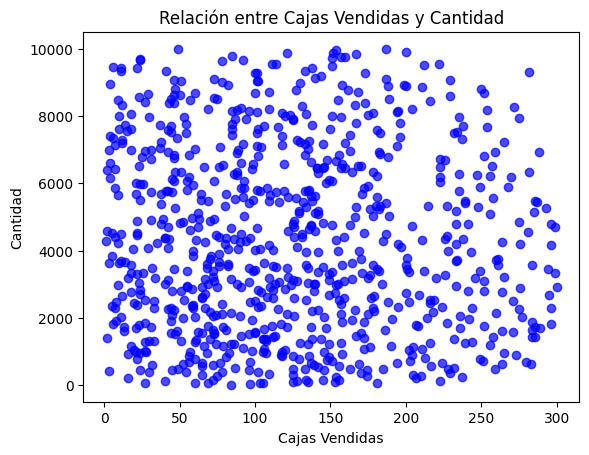

In [62]:
plt.scatter(dato['Cajas_vendidas'], dato['Cantidad'], color='blue', alpha=0.7)
plt.title('Relación entre Cajas Vendidas y Cantidad')
plt.xlabel('Cajas Vendidas')
plt.ylabel('Cantidad')
plt.show()

In [63]:
# Coeficiente de correlación de Spearman
correlacion_spearman = dato['Cajas_vendidas'].corr(dato['Cantidad'], method='spearman')
print("Coeficiente de correlación de Spearman:", correlacion_spearman)

Coeficiente de correlación de Spearman: -0.04030822732086697


### Existen dos metodos estadisticos para identificar outlier:
1. Percentiles: identifican los datos que se encuentran fuera del rango intercuartilico (IQR). Este método no hace suposiciones sobre la distribución, por lo que es ideal para los datos que no siguen una distribución normal. la limitación: puede ser sensible si hay demasiado valores extremos. los pasos: a. Calular el IQR= Q3-Q1, donde Q1 es el primer cuartil y Q3 el tercer cuartil b. determinar los limites: limite inferior= Q1-1.5xIQR limite superior= Q3+1.5xIQR c. los valores que se encuentran fuera de estos limites son outliers.
Nota: El enfoque del IQR es más robusto frente a la distribución de los datos, especialmente si no son normales o presentan sesgos.

In [64]:
# Seleccionar columnas numéricas del DataFrame
dato_numerico = dato.select_dtypes(include=['number'])

# Crear un diccionario para almacenar los outliers por columna
outliers_por_columna = {}
# Crear un diccionario para almacenar el número de outliers por columna
cantidad_outliers = {}

# Iterar sobre cada columna numérica
for col in dato_numerico.columns:
    # Calcular el primer cuartil (Q1), tercer cuartil (Q3) y el rango intercuartílico (IQR)
    Q1 = dato_numerico[col].quantile(0.25)
    Q3 = dato_numerico[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para identificar los outliers
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    # Identificar los valores atípicos en la columna
    outliers = dato_numerico[(dato_numerico[col] < umbral_inferior) | (dato_numerico[col] > umbral_superior)]

    # Contar la cantidad de outliers y almacenarlos en el diccionario
    cantidad_outliers[col] = outliers[col].shape[0]
    # Guardar los outliers encontrados en el diccionario
    outliers_por_columna[col] = outliers[col]

    # Mostrar los resultados
    print(f"\nColumna: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Umbral inferior: {umbral_inferior}")
    print(f"Umbral superior: {umbral_superior}")
    print(f"Outliers encontrados: {outliers[col].shape[0]}")
    print()
    print("Outliers encontrados:")
    print(outliers[col])



Columna: Cantidad
Q1: 2005.5
Q3: 6485.5
IQR: 4480.0
Umbral inferior: -4714.5
Umbral superior: 13205.5
Outliers encontrados: 0

Outliers encontrados:
Series([], Name: Cantidad, dtype: float64)

Columna: Cajas_vendidas
Q1: 61.25
Q3: 176.75
IQR: 115.5
Umbral inferior: -112.0
Umbral superior: 350.0
Outliers encontrados: 0

Outliers encontrados:
Series([], Name: Cajas_vendidas, dtype: int64)


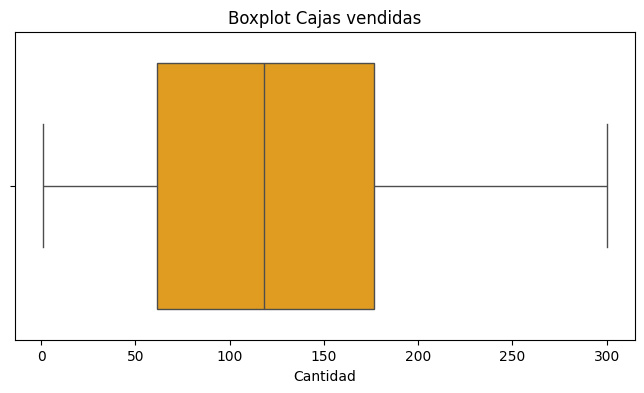

In [65]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dato['Cajas_vendidas'], color='orange')
plt.title("Boxplot Cajas vendidas")
plt.xlabel("Cantidad")
plt.show()

Conclusión:
Al analizar las columnas "Cantidad" y "Cajas_vendidas" mediante gráficos de caja, se observa que ambas presentan un sesgo significativo hacia la derecha. Este sesgo se evidencia en la asimetría de las distribuciones, donde los extremos superiores de los datos muestran una mayor dispersión en comparación con los extremos inferiores.

En la columna "Cantidad", la presencia de múltiples valores atípicos en el rango superior sugiere casos excepcionales que se alejan considerablemente del núcleo principal de los datos. Este comportamiento es típico de distribuciones donde la mayoría de los datos están concentrados en valores bajos, mientras que algunos eventos específicos generan valores más altos.

De manera similar, en la columna "Cajas_vendidas", la distribución refleja un sesgo hacia la derecha debido a valores atípicos en el extremo superior, significativamente alejados del rango intercuartílico (IQR). El bigote derecho más largo refuerza la existencia de una mayor dispersión hacia valores altos. La mayoría de los datos, sin embargo, permanecen concentrados en rangos más bajos, destacando posibles picos inusuales en el comportamiento de esta variable.

**En ambos casos**, es esencial considerar el impacto del sesgo y los valores atípicos al interpretar los resultados y tomar decisiones. Ignorar estos factores podría distorsionar los análisis y afectar la validez de las conclusiones obtenidas.

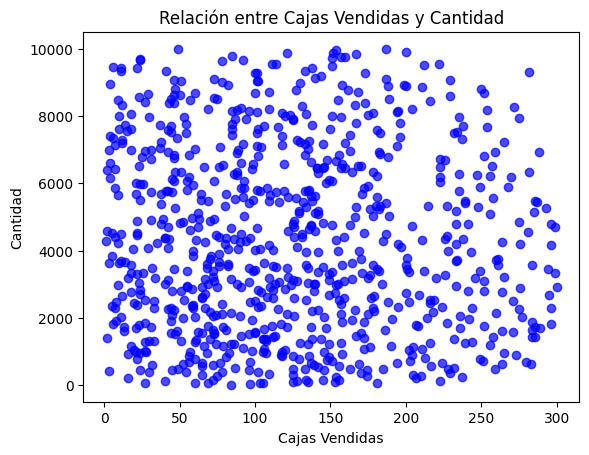

In [66]:
plt.scatter(dato['Cajas_vendidas'], dato['Cantidad'], color='blue', alpha=0.7)
plt.title('Relación entre Cajas Vendidas y Cantidad')
plt.xlabel('Cajas Vendidas')
plt.ylabel('Cantidad')
plt.show()

### 2. Método es Desviación estándar: Calcula la media y la desviación estándar de los datos. Aquellos puntos que se encuentran a más de 3 desviaciones estándar de la media pueden ser considerados outliers.

### Debemos saber si mis datos proviene de una población que sigue una distribución normal.
Para saber si los datos proviene de una población normal, se utiliza la prueba de normalidad, donde hay dos pruebas.
la primera prueba es Shapiro - wilk
la segunda prueba es Anderson-Darling


### Nota: No es necesario realizar una prueba de prueba de normalidad antes detectar outliers, pero si sabes si tus datos son normales puede guiarte hacia un analisis mas precisos.

In [67]:
# Seleccionar columnas numéricas del DataFrame
dato_numerico = dato.select_dtypes(include=['number'])

# Crear un diccionario para almacenar los outliers por columna
outliers_por_columna = {}
# Crear un diccionario para almacenar el número de outliers por columna
cantidad_outliers = {}

# Iterar sobre cada columna numérica
for col in dato_numerico.columns:
    # Calcular la media y desviación estándar para la columna
    media = dato_numerico[col].mean()
    desviacion_estandar = dato_numerico[col].std()

    # Definir los límites para identificar los outliers
    umbral_inferior = media - 3 * desviacion_estandar
    umbral_superior = media + 3 * desviacion_estandar

    # Identificar los valores atípicos en la columna
    outliers = dato_numerico[(dato_numerico[col] < umbral_inferior) | (dato_numerico[col] > umbral_superior)]

    # Contar la cantidad de outliers y almacenalo en el diccionario
    cantidad_outliers[col] = outliers[col].shape[0]
    # Guardar los outliers encontrados en el diccionario
    outliers_por_columna[col] = outliers[col]

    # Mostrar los resultados
    print(f"\nColumna: {col}")
    print(f"Media: {media}")
    print(f"Desviación estándar: {desviacion_estandar}")
    print(f"Umbral inferior: {umbral_inferior}")
    print(f"Umbral superior: {umbral_superior}")
    print(f"Outliers encontrados: {outliers[col].shape[0]}")
    print()
    print("Outliers encontrados:")
    print(outliers[col])


Columna: Cantidad
Media: 4312.403508771929
Desviación estándar: 2719.1769009957097
Umbral inferior: -3845.1271942152
Umbral superior: 12469.934211759059
Outliers encontrados: 0

Outliers encontrados:
Series([], Name: Cantidad, dtype: float64)

Columna: Cajas_vendidas
Media: 124.62406015037594
Desviación estándar: 77.19582895198953
Umbral inferior: -106.96342670559262
Umbral superior: 356.2115470063445
Outliers encontrados: 0

Outliers encontrados:
Series([], Name: Cajas_vendidas, dtype: int64)


#### ¿Cuáles de los dos método es el mas eficiente para identificar outliers es el mas recomendable?
    1. Si tus datos son pequeños o tienes pocas columnas, IQR o un análisis visual con boxplots puede ser suficiente.
    2. Si tus datos siguen una distribución normal, el método de desviaciones estándar es más adecuado.
    3. Para conjuntos de datos grandes, complejos, o de múltiples dimensiones, los métodos avanzados como Isolation Forest o DBSCAN ofrecen una ventaja significativa.

In [68]:
# Revisamos el data set si esta limpio
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]
    min=[]
    max=[]
    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])
        min.append(df[col].min())
        max.append(df[col].max())
    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Minimo":min,
        "Maximo":max,
        "Valor Único": unique
    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')
    return result_trans

## Resultado de la limpieza de los datos

In [69]:
dato.head(10)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91
5,van tuxwell,india,smooth sliky salty,2022-06-06,5376.0,38
7,gunar cockshoot,australia,after nines,2022-03-24,3080.0,73
8,jehu rudeforth,new zealand,50% dark bites,2022-04-20,3990.0,59
9,brien boise,australia,99% dark & pure,2022-07-04,2835.0,102
10,rafaelita blaksland,uk,smooth sliky salty,2022-01-13,4704.0,62
11,barr faughny,usa,orange choco,2022-03-10,3703.0,11
12,mallorie waber,canada,eclairs,2022-01-13,1442.0,286


In [70]:
Estructura_datos_final = analizar_dataframe(dato)
Estructura_datos_final

Cantidad de Columnas: 6
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Minimo,Maximo,Valor Único
0,Persona_venta,798,object,0,andria kimpton,wilone o'kielt,jehu rudeforth
1,Pais,798,object,0,australia,usa,uk
2,Producto,798,object,0,50% dark bites,white choc,mint chip choco
3,fecha,798,datetime64[ns],0,2022-01-03 00:00:00,2022-08-31 00:00:00,2022-01-04 00:00:00
4,Cantidad,798,float64,0,7.0,9989.0,5320.0
5,Cajas_vendidas,798,int64,0,1,300,180
